<a href="https://colab.research.google.com/github/Hitika-Jain/ccm/blob/main/ccmsyntheticdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install nibabel numpy matplotlib opencv-python Pillow


Data shape: (256, 256, 128, 1)


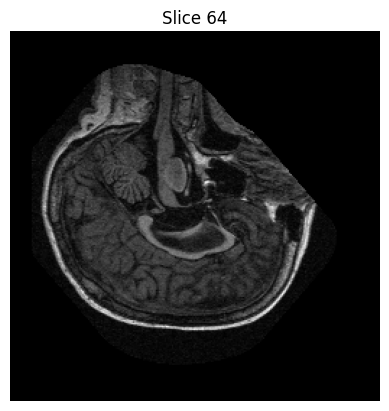

In [7]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Provide the full path, including the .img extension
file_path_img = "/content/OAS1_0001_MR1_mpr-1_anon.img"
file_path_hdr = "/content/OAS1_0001_MR1_mpr-1_anon.hdr"

# Load the file using Nibabel
img = nib.load(file_path_img)  # Nibabel should automatically find the .hdr file
data = img.get_fdata()  # Extract the 3D voxel data as a NumPy array

# Print the shape of the data
print("Data shape:", data.shape)

# Visualize a slice
slice_idx = data.shape[2] // 2  # Choose a middle slice along the z-axis
# Squeeze the data to remove the singleton dimension
slice_data = np.squeeze(data[:, :, slice_idx, :])
# slice_data = data[:, :, slice_idx]

# plt.imshow(slice_data.T, cmap="gray")  # Transpose to align proper orientation
# plt.title(f"Slice {slice_idx}")
# plt.axis("off")
# plt.show()

# Visualize the 2D slice
plt.imshow(slice_data.T, cmap="gray")  # Transpose to align orientation
plt.title(f"Slice {slice_idx}")
plt.axis("off")
plt.show()

In [8]:
import os
# Normalize the data to [0, 1]
data = (data - np.min(data)) / (np.max(data) - np.min(data))

# Save each slice for synthetic augmentation
output_dir = "/content/slices"
os.makedirs(output_dir, exist_ok=True)

# Save slices as PNGs
for i in range(data.shape[2]):  # Iterate over slices
    slice_data = np.squeeze(data[:, :, i, :])
    plt.imsave(f"{output_dir}/slice_{i}.png", slice_data.T, cmap="gray")
print(f"All slices saved to {output_dir}")

All slices saved to /content/slices


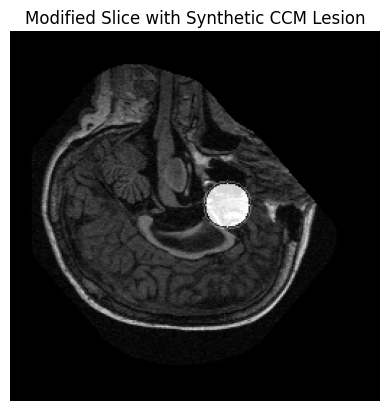

In [9]:
import cv2
import random

def add_ccm_lesion(slice_data, center, radius):
    """
    Add a synthetic CCM lesion to the MRI slice.
    Args:
        slice_data: 2D NumPy array (MRI slice).
        center: Tuple (x, y) for lesion center.
        radius: Radius of the lesion.
    Returns:
        Modified slice with synthetic lesion.
    """
    # Draw the main lesion (mixed intensity)
    lesion = np.zeros_like(slice_data)
    cv2.circle(lesion, center, radius, random.uniform(0.5, 0.8), -1)  # Fill lesion

    # Add surrounding hypointense ring
    cv2.circle(lesion, center, radius + 2, random.uniform(0.1, 0.3), 1)

    # Blend lesion with the original slice
    slice_data = np.clip(slice_data + lesion, 0, 1)
    return slice_data

# Example: Modify a specific slice
slice_idx = 64  # Modify the middle slice
slice_data = np.squeeze(data[:, :, slice_idx, :]).copy()

# Add a lesion at a random location
modified_slice = add_ccm_lesion(slice_data, center=(120, 150), radius=15)

# Visualize the modified slice
plt.imshow(modified_slice.T, cmap="gray")
plt.title("Modified Slice with Synthetic CCM Lesion")
plt.axis("off")
plt.show()


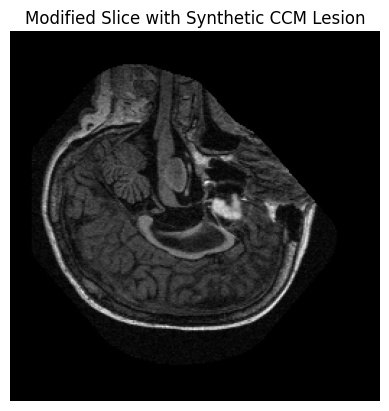

In [10]:
import cv2
import random
import numpy as np

def add_popcorn_ccm_lesion(slice_data, center, radius):
    """
    Add a synthetic "popcorn-like" CCM lesion to the MRI slice.
    Args:
        slice_data: 2D NumPy array (MRI slice).
        center: Tuple (x, y) for lesion center.
        radius: Radius of the lesion.
    Returns:
        Modified slice with synthetic lesion.
    """
    lesion = np.zeros_like(slice_data)

    # Main lesion area with heterogeneous intensities
    for _ in range(10):  # Add random patches
        patch_center = (
            center[0] + random.randint(-radius // 2, radius // 2),
            center[1] + random.randint(-radius // 2, radius // 2),
        )
        patch_radius = random.randint(2, radius // 3)
        intensity = random.uniform(0.4, 0.8)
        cv2.circle(lesion, patch_center, patch_radius, intensity, -1)

    # Add hypointense ring around the lesion
    cv2.circle(lesion, center, radius + 2, random.uniform(0.1, 0.3), 1)

    # Smooth the lesion for natural appearance
    lesion = cv2.GaussianBlur(lesion, (5, 5), 1)

    # Blend lesion with the original slice
    slice_data = np.clip(slice_data + lesion, 0, 1)
    return slice_data

# Example: Modify a specific slice
slice_idx = 64  # Modify the middle slice
slice_data = np.squeeze(data[:, :, slice_idx, :]).copy()

# Add a popcorn-like lesion at a random location
modified_slice = add_popcorn_ccm_lesion(slice_data, center=(120, 150), radius=15)

# Visualize the modified slice
plt.imshow(modified_slice.T, cmap="gray")
plt.title("Modified Slice with Synthetic CCM Lesion")
plt.axis("off")
plt.show()


In [13]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
import os

# Path to your HDR/IMG files
hdr_path = '/content/OAS1_0002_MR1_mpr-1_anon.hdr'
img_path = '/content/OAS1_0002_MR1_mpr-1_anon.img'

# Load the MRI image
mri_obj = nib.load(hdr_path)  # nibabel automatically reads HDR/IMG pairs
mri_data = mri_obj.get_fdata()  # Extract the MRI image data as a NumPy array
# Squeeze the 4D data to 3D
mri_data = np.squeeze(mri_data)  # Shape becomes (256, 256, 128)
print(f"Squeezed data shape: {mri_data.shape}")

#print(f"Data shape: {mri_data.shape}")  # Example shape: (256, 256, 128)


Squeezed data shape: (256, 256, 128)


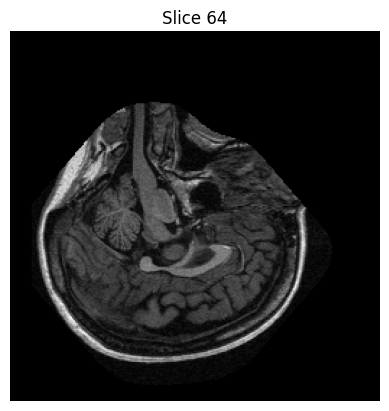

In [14]:
slice_idx = 64  # Choose the middle slice
mri_slice = mri_data[:, :, slice_idx]

# Normalize the slice to 0-1
mri_slice = (mri_slice - np.min(mri_slice)) / (np.max(mri_slice) - np.min(mri_slice))

# Visualize the slice
plt.imshow(mri_slice.T, cmap="gray")  # Transpose for orientation
plt.title(f"Slice {slice_idx}")
plt.axis("off")
plt.show()

In [10]:
def overlay_lesion_3d(mri_data, slice_idx, lesion, x, y):
    """
    Overlay a lesion on a specific 2D slice of 3D MRI data.
    Args:
        mri_data: 3D NumPy array (H, W, S).
        slice_idx: Index of the slice where the lesion will be overlaid.
        lesion: 2D NumPy array of the lesion.
        x, y: Top-left position to overlay the lesion.
    Returns:
        Modified MRI data with the lesion.
    """
    mri_slice = mri_data[:, :, slice_idx]  # Extract 2D slice
    h, w = lesion.shape

    # Ensure lesion fits within the slice dimensions
    if x + h > mri_slice.shape[0] or y + w > mri_slice.shape[1]:
        raise ValueError("Lesion does not fit within the slice boundaries!")

    # Overlay the lesion by blending
    mri_slice[x:x+h, y:y+w] = np.clip(mri_slice[x:x+h, y:y+w] + lesion, 0, 1)
    mri_data[:, :, slice_idx] = mri_slice  # Update the slice in the MRI data
    return mri_data



corrected

Overlaying lesion on slice 72 at position (6, 87) with alpha=0.5
Overlaying lesion on slice 81 at position (156, 28) with alpha=0.5
Overlaying lesion on slice 74 at position (174, 134) with alpha=0.5
Overlaying lesion on slice 110 at position (152, 137) with alpha=0.5
Overlaying lesion on slice 88 at position (59, 109) with alpha=0.5


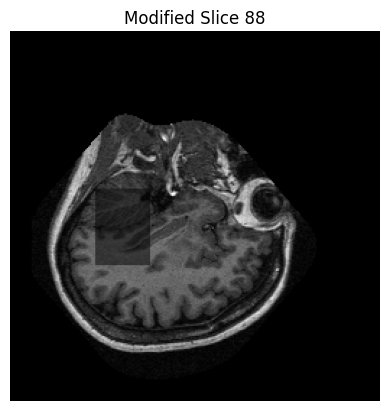

In [20]:
def overlay_lesion_3d_alpha(mri_data, slice_idx, lesion, x, y, alpha=0.5):
    """
    Overlay a lesion on a specific 2D slice of 3D MRI data using alpha blending.
    Args:
        mri_data: 3D NumPy array (H, W, S).
        slice_idx: Index of the slice where the lesion will be overlaid.
        lesion: 2D NumPy array of the lesion.
        x, y: Top-left position to overlay the lesion.
        alpha: Alpha value for blending (0 = no lesion, 1 = fully opaque lesion).
    Returns:
        Modified MRI data with the lesion.
    """
    print(f"Overlaying lesion on slice {slice_idx} at position ({x}, {y}) with alpha={alpha}")
    mri_slice = mri_data[:, :, slice_idx]  # Extract 2D slice
    h, w = lesion.shape

    # Ensure lesion fits within the slice dimensions
    if x + h > mri_slice.shape[0] or y + w > mri_slice.shape[1]:
        raise ValueError("Lesion does not fit within the slice boundaries!")

    # Normalize lesion intensity to match the MRI intensity
    lesion_resized = cv2.resize(lesion, (w, h))
    lesion_resized = (lesion_resized - np.min(lesion_resized)) / (np.max(lesion_resized) - np.min(lesion_resized))

    # Apply alpha blending: weighted sum of MRI slice and lesion
    mri_slice[x:x+h, y:y+w] = (1 - alpha) * mri_slice[x:x+h, y:y+w] + alpha * lesion_resized

    mri_data[:, :, slice_idx] = mri_slice  # Update the slice in the MRI data
    return mri_data

# Example usage:
# Assuming augmented lesions are already generated and stored
for lesion_aug in augmented_lesions:
    slice_idx = random.randint(0, mri_data.shape[2] - 1)  # Random slice
    x = random.randint(0, mri_data.shape[0] - lesion_aug.shape[0] - 1)
    y = random.randint(0, mri_data.shape[1] - lesion_aug.shape[1] - 1)

    # Apply the overlay with alpha blending
    try:
        mri_data = overlay_lesion_3d_alpha(mri_data, slice_idx, lesion_aug, x, y, alpha=0.5)
    except ValueError as e:
        print(e)

# Optional: Display the modified slice
plt.imshow(mri_data[:, :, slice_idx].T, cmap="gray")
plt.title(f"Modified Slice {slice_idx}")
plt.axis("off")
plt.show()



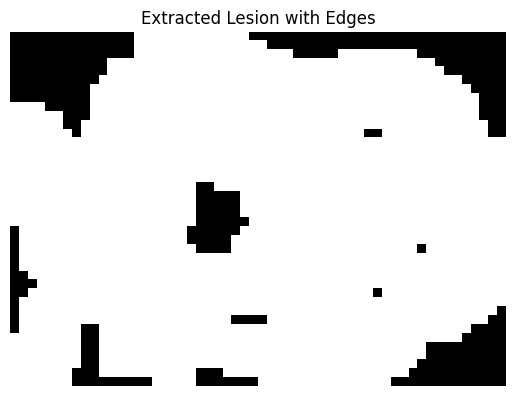

In [22]:
import cv2
import numpy as np

def extract_lesion_with_edges(lesion_image):
    # Convert to grayscale if not already
    lesion_gray = lesion_image

    # Apply Gaussian Blur to smooth the image (removes noise)
    lesion_blurred = cv2.GaussianBlur(lesion_gray, (5, 5), 0)

    # Perform edge detection using Canny
    edges = cv2.Canny(lesion_blurred, threshold1=50, threshold2=150)

    # Use morphological transformations to fill the edges
    kernel = np.ones((5, 5), np.uint8)
    dilated_edges = cv2.dilate(edges, kernel, iterations=1)

    # Fill the lesion area (white) and apply the mask
    lesion_mask = np.zeros_like(lesion_gray)
    lesion_mask[dilated_edges > 0] = 255  # Make sure the lesion is white

    return lesion_mask

# Example usage: Assuming 'lesion_image' is your cropped lesion image
lesion = cv2.imread('/content/lesion2.png', cv2.IMREAD_GRAYSCALE)
lesion_mask = extract_lesion_with_edges(lesion)

# Display the result
plt.imshow(lesion_mask, cmap='gray')
plt.title("Extracted Lesion with Edges")
plt.axis("off")
plt.show()


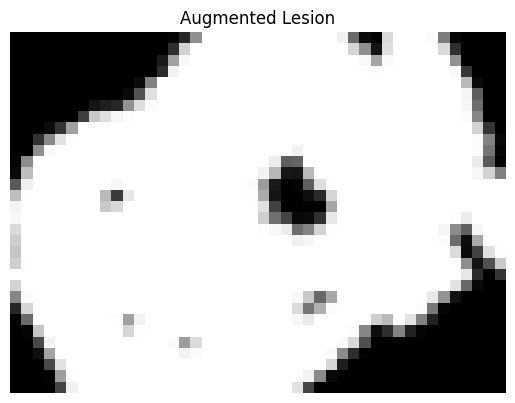

In [23]:
def augment_lesion(lesion_mask):
    # Apply different augmentations (rotation, flipping, scaling, etc.)

    # Random rotation
    angle = random.randint(-30, 30)
    rows, cols = lesion_mask.shape
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    rotated_lesion = cv2.warpAffine(lesion_mask, M, (cols, rows))

    # Random scaling
    scale_factor = random.uniform(0.7, 1.3)  # Scale between 70% and 130%
    resized_lesion = cv2.resize(rotated_lesion, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)

    # Random flipping
    if random.choice([True, False]):
        resized_lesion = cv2.flip(resized_lesion, flipCode=1)  # Flip horizontally

    return resized_lesion

augmented_lesion = augment_lesion(lesion_mask)

# Display the augmented lesion
plt.imshow(augmented_lesion, cmap='gray')
plt.title("Augmented Lesion")
plt.axis("off")
plt.show()


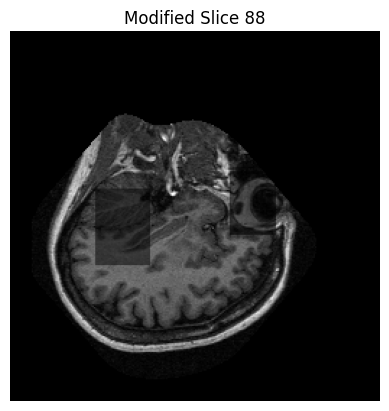

In [24]:
def overlay_lesion_with_smooth_edges(mri_data, slice_idx, lesion, x, y, alpha=0.5):
    mri_slice = mri_data[:, :, slice_idx]  # Extract the 2D MRI slice

    # Ensure lesion fits within the slice
    h, w = lesion.shape
    if x + h > mri_slice.shape[0] or y + w > mri_slice.shape[1]:
        raise ValueError("Lesion does not fit within the slice boundaries!")

    # Normalize the lesion intensity (0-1 range)
    lesion_normalized = (lesion - np.min(lesion)) / (np.max(lesion) - np.min(lesion))

    # Apply alpha blending for smooth overlay
    mri_slice[x:x+h, y:y+w] = (1 - alpha) * mri_slice[x:x+h, y:y+w] + alpha * lesion_normalized

    mri_data[:, :, slice_idx] = mri_slice  # Update the MRI data with the new slice
    return mri_data

# Example overlay
x, y = random.randint(0, 200), random.randint(0, 200)  # Random position for the lesion
mri_data = overlay_lesion_with_smooth_edges(mri_data, slice_idx, augmented_lesion, x, y, alpha=0.6)

# Display the modified MRI slice with the lesion
plt.imshow(mri_data[:, :, slice_idx].T, cmap="gray")
plt.title(f"Modified Slice {slice_idx}")
plt.axis("off")
plt.show()


In [15]:
import cv2
import numpy as np
import random

# Load and normalize a lesion
lesion = cv2.imread('/content/lesion2.png', cv2.IMREAD_GRAYSCALE)
lesion = lesion / 255.0  # Normalize to 0-1

# Create an empty list for augmented lesions
augmented_lesions = []

# Perform augmentations
for _ in range(5):  # Generate 5 augmented versions
    # Random resize
    scale = random.uniform(0.8, 1.2)  # Scale between 80% and 120%
    h, w = lesion.shape
    lesion_resized = cv2.resize(lesion, (int(w * scale), int(h * scale)))

    # Random rotation
    angle = random.randint(0, 360)
    center = (lesion_resized.shape[1] // 2, lesion_resized.shape[0] // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    lesion_rotated = cv2.warpAffine(lesion_resized, rotation_matrix,
                                    (lesion_resized.shape[1], lesion_resized.shape[0]))

    # Add the augmented lesion to the list
    augmented_lesions.append(lesion_rotated)


In [16]:
if lesion.max() > 1 or lesion.min() < 0:
    print("Lesion values are not normalized. Normalizing now.")
    lesion = lesion / 255.0

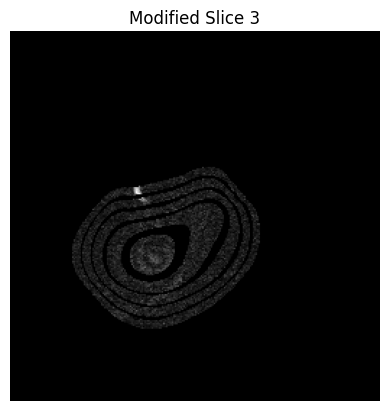

In [19]:
for lesion_aug in augmented_lesions:
    slice_idx = random.randint(0, mri_data.shape[2] - 1)  # Random slice
    x = random.randint(0, mri_data.shape[0] - lesion_aug.shape[0] - 1)
    y = random.randint(0, mri_data.shape[1] - lesion_aug.shape[1] - 1)

    # Verification of lesion placement
    if x + lesion_aug.shape[0] > mri_data.shape[0] or y + lesion_aug.shape[1] > mri_data.shape[1]:
        print(f"Lesion at ({x}, {y}) exceeds slice boundaries. Skipping this lesion.")
        continue  # Skip this lesion and move to the next one

    try:
        mri_data = overlay_lesion_3d(mri_data, slice_idx, lesion_aug, x, y)
    except ValueError as e:
        print(e)

# Optional: Display a modified slice
plt.imshow(mri_data[:, :, slice_idx].T, cmap="gray")
plt.title(f"Modified Slice {slice_idx}")
plt.axis("off")
plt.show()

In [11]:
for lesion_aug in augmented_lesions:
    slice_idx = random.randint(0, mri_data.shape[2] - 1)  # Random slice index
    x = random.randint(0, mri_data.shape[0] - lesion_aug.shape[0])  # Random x
    y = random.randint(0, mri_data.shape[1] - lesion_aug.shape[1])  # Random y

    try:
        mri_data = overlay_lesion_3d(mri_data, slice_idx, lesion_aug, x, y)
    except ValueError:
        print(f"Skipped lesion at ({x}, {y}) on slice {slice_idx} (out of bounds)")



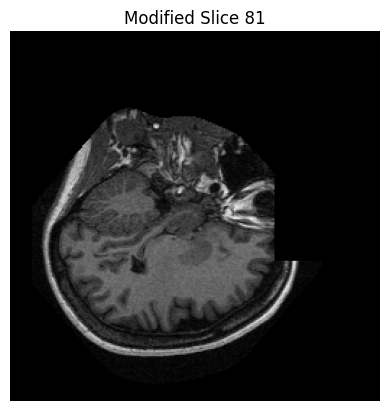

In [12]:
modified_slice_idx = slice_idx  # Use the last slice modified in the loop
modified_slice = mri_data[:, :, modified_slice_idx]

plt.imshow(modified_slice.T, cmap="gray")
plt.title(f"Modified Slice {modified_slice_idx}")
plt.axis("off")
plt.show()


approach 2

In [25]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
import os

# Path to your HDR/IMG files
hdr_path = '/content/OAS1_0002_MR1_mpr-2_anon.hdr'
img_path = '/content/OAS1_0002_MR1_mpr-2_anon.img'

# Load the MRI image
mri_obj = nib.load(hdr_path)  # nibabel automatically reads HDR/IMG pairs
mri_data = mri_obj.get_fdata()  # Extract the MRI image data as a NumPy array
# Squeeze the 4D data to 3D
mri_data = np.squeeze(mri_data)  # Shape becomes (256, 256, 128)
print(f"Squeezed data shape: {mri_data.shape}")


Squeezed data shape: (256, 256, 128)


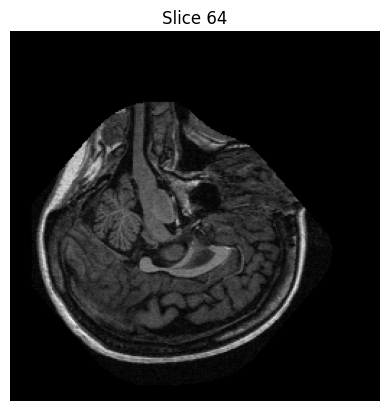

In [26]:
slice_idx = 64  # Choose the middle slice
mri_slice = mri_data[:, :, slice_idx]

# Normalize the slice to 0-1
mri_slice = (mri_slice - np.min(mri_slice)) / (np.max(mri_slice) - np.min(mri_slice))

# Visualize the slice
plt.imshow(mri_slice.T, cmap="gray")  # Transpose for orientation
plt.title(f"Slice {slice_idx}")
plt.axis("off")
plt.show()

In [30]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

def extract_lesion_with_edges(lesion_image):
    # Apply Gaussian Blur to smooth the image (removes noise)
    lesion_blurred = cv2.GaussianBlur(lesion_image, (5, 5), 0)

    # Perform edge detection using Canny
    edges = cv2.Canny(lesion_blurred, threshold1=50, threshold2=150)

    # Use morphological transformations to smooth the edges and close gaps
    kernel = np.ones((7, 7), np.uint8)
    dilated_edges = cv2.dilate(edges, kernel, iterations=1)

    # Fill the lesion area (white) and apply the mask
    lesion_mask = np.zeros_like(lesion_image)
    lesion_mask[dilated_edges > 0] = 255  # Lesion is white

    # Apply contour detection to refine the boundary shape
    contours, _ = cv2.findContours(lesion_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(lesion_mask, contours, -1, (255), thickness=cv2.FILLED)

    return lesion_mask

def overlay_lesion_on_slice(mri_slice, lesion_mask, lesion_image, x, y):
    """
    Overlay a lesion image onto an MRI slice with smooth blending.
    Args:
        mri_slice: 2D array representing an MRI slice.
        lesion_mask: 2D mask of the lesion's shape (values: 0 or 1).
        lesion_image: The lesion image to be overlaid.
        x, y: The position (top-left) to overlay the lesion.
    Returns:
        Modified MRI slice.
    """
    h, w = lesion_mask.shape
    # Extract the region of interest (ROI) from the MRI slice
    mri_roi = mri_slice[x:x+h, y:y+w]

    # Normalize the lesion and MRI region intensities to 0-1 (if needed)
    lesion_image = lesion_image / 255.0 if lesion_image.max() > 1 else lesion_image
    mri_roi = mri_roi / 255.0 if mri_roi.max() > 1 else mri_roi

    # Combine using blending: lesion_mask * lesion + (1 - lesion_mask) * mri
    blended_roi = (lesion_mask * lesion_image) + ((1 - lesion_mask) * mri_roi)

    # Restore the blended region back into the MRI slice
    mri_slice[x:x+h, y:y+w] = blended_roi * 255  # Scale back to original intensity range

    return mri_slice


# Load MRI slice and lesion image
#mri_slice = cv2.imread('/content/mri_slice.png', cv2.IMREAD_GRAYSCALE)  # Your MRI slice
lesion_image = cv2.imread('/content/lesion8.png', cv2.IMREAD_GRAYSCALE)  # Your lesion image
lesion_image = lesion_image / 255.0  # Normalize to 0-1

# Extract lesion mask
lesion_mask = extract_lesion_with_edges(lesion_image)

# Randomly choose a position to overlay the lesion
x = random.randint(0, mri_slice.shape[0] - lesion_mask.shape[0] - 1)
y = random.randint(0, mri_slice.shape[1] - lesion_mask.shape[1] - 1)

# Overlay lesion onto MRI slice
modified_slice = overlay_lesion_on_slice(mri_slice, lesion_mask, lesion_image, x, y)

# Display the result
plt.imshow(modified_slice, cmap='gray')
plt.title(f"Modified Slice with Lesion")
plt.axis("off")
plt.show()


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/canny.cpp:829: error: (-215:Assertion failed) _src.depth() == CV_8U in function 'Canny'


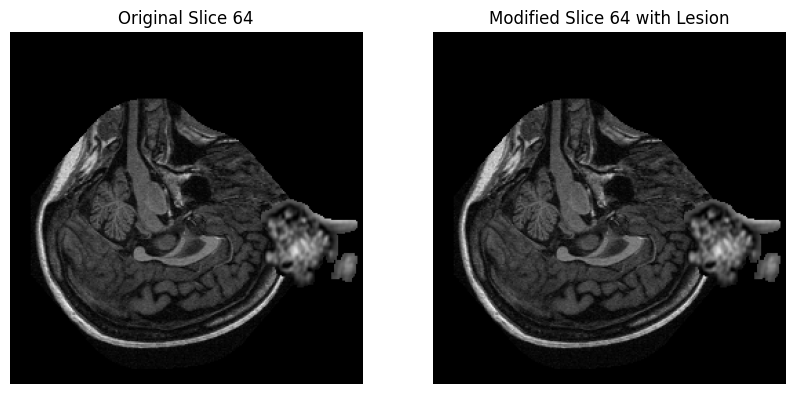

In [31]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

# Step 1: Load MRI Data and Extract a Slice
def load_mri_slice(hdr_path, img_path, slice_idx):
    """
    Load an MRI volume from HDR/IMG files and extract a specific 2D slice.
    """
    mri_obj = nib.load(hdr_path)  # nibabel reads HDR/IMG pairs
    mri_data = mri_obj.get_fdata()  # Extract data as a NumPy array
    mri_data = np.squeeze(mri_data)  # Ensure 3D shape (256, 256, 128)
    mri_slice = mri_data[:, :, slice_idx]  # Extract the desired slice
    # Normalize the slice to range 0-1
    mri_slice = (mri_slice - np.min(mri_slice)) / (np.max(mri_slice) - np.min(mri_slice))
    return mri_slice

# Step 2: Extract Lesion with Edges
def extract_lesion_with_edges(lesion_image):
    """
    Extract a lesion mask by detecting edges and filling the region.
    """
    # Smooth the image using Gaussian Blur
    lesion_blurred = cv2.GaussianBlur(lesion_image, (5, 5), 0)
    # Detect edges using Canny
    edges = cv2.Canny(lesion_blurred, threshold1=50, threshold2=150)
    # Dilate edges to enhance the boundary
    kernel = np.ones((5, 5), np.uint8)
    dilated_edges = cv2.dilate(edges, kernel, iterations=1)
    # Create a binary mask
    lesion_mask = np.zeros_like(lesion_image)
    lesion_mask[dilated_edges > 0] = 1
    # Fill the contour to define the lesion shape
    contours, _ = cv2.findContours(lesion_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(lesion_mask, contours, -1, (1), thickness=cv2.FILLED)
    return lesion_mask

# Step 3: Overlay Lesion on MRI Slice
def overlay_lesion_on_slice(mri_slice, lesion_mask, lesion_image, x, y):
    """
    Overlay the lesion image onto the MRI slice with smooth blending.
    """
    h, w = lesion_mask.shape
    # Extract the region of interest (ROI) from the MRI slice
    mri_roi = mri_slice[x:x+h, y:y+w].copy()  # Copy the region to modify
    # Normalize lesion and MRI intensities to 0-1
    lesion_image = lesion_image / 255.0 if lesion_image.max() > 1 else lesion_image
    mri_roi = mri_roi / 255.0 if mri_roi.max() > 1 else mri_roi
    # Blend the lesion onto the MRI slice
    blended_roi = (lesion_mask * lesion_image) + ((1 - lesion_mask) * mri_roi)
    mri_slice[x:x+h, y:y+w] = blended_roi  # Update the MRI slice
    return mri_slice

# Step 4: Main Script
def main():
    # Paths to MRI files
    hdr_path = '/content/OAS1_0002_MR1_mpr-2_anon.hdr'
    img_path = '/content/OAS1_0002_MR1_mpr-2_anon.img'
    slice_idx = 64  # Slice index to extract

    # Load MRI slice
    mri_slice = load_mri_slice(hdr_path, img_path, slice_idx)

    # Load and preprocess lesion image
    lesion_image = cv2.imread('/content/lesion8.png', cv2.IMREAD_GRAYSCALE)  # Your lesion image
    if lesion_image is None:
        raise FileNotFoundError("Lesion image not found.")
    lesion_mask = extract_lesion_with_edges(lesion_image)

    # Ensure the lesion fits within the MRI slice
    x = random.randint(0, mri_slice.shape[0] - lesion_mask.shape[0] - 1)
    y = random.randint(0, mri_slice.shape[1] - lesion_mask.shape[1] - 1)

    # Overlay lesion onto the MRI slice
    modified_slice = overlay_lesion_on_slice(mri_slice, lesion_mask, lesion_image, x, y)

    # Visualize original and modified slices
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(mri_slice.T, cmap='gray')  # Original slice
    plt.title(f"Original Slice {slice_idx}")
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(modified_slice.T, cmap='gray')  # Modified slice
    plt.title(f"Modified Slice {slice_idx} with Lesion")
    plt.axis("off")
    plt.show()

# Run the script
if __name__ == "__main__":
    main()


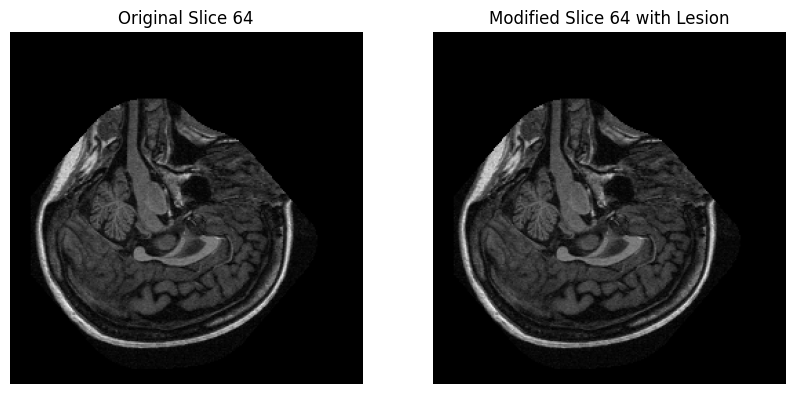

In [32]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random


def load_mri_slice(hdr_path, img_path, slice_idx):
    """
    Load an MRI volume from HDR/IMG files and extract a specific 2D slice.
    """
    mri_obj = nib.load(hdr_path)  # nibabel reads HDR/IMG pairs
    mri_data = mri_obj.get_fdata()  # Extract data as a NumPy array
    mri_data = np.squeeze(mri_data)  # Ensure 3D shape (256, 256, 128)
    mri_slice = mri_data[:, :, slice_idx]  # Extract the desired slice
    # Normalize the slice to range 0-1
    mri_slice = (mri_slice - np.min(mri_slice)) / (np.max(mri_slice) - np.min(mri_slice))
    return mri_slice


def extract_lesion_with_edges(lesion_image):
    """
    Extract a lesion mask by detecting edges and filling the region.
    """
    # Smooth the image using Gaussian Blur
    lesion_blurred = cv2.GaussianBlur(lesion_image, (5, 5), 0)
    # Detect edges using Canny
    edges = cv2.Canny(lesion_blurred, threshold1=50, threshold2=150)
    # Dilate edges to enhance the boundary
    kernel = np.ones((5, 5), np.uint8)
    dilated_edges = cv2.dilate(edges, kernel, iterations=1)
    # Create a binary mask
    lesion_mask = np.zeros_like(lesion_image)
    lesion_mask[dilated_edges > 0] = 1
    # Fill the contour to define the lesion shape
    contours, _ = cv2.findContours(lesion_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(lesion_mask, contours, -1, (1), thickness=cv2.FILLED)
    return lesion_mask


def overlay_lesion_on_slice(mri_slice, lesion_mask, lesion_image, brain_mask, x, y):
    """
    Overlay the lesion image onto the MRI slice with smooth blending.
    """
    h, w = lesion_mask.shape
    # Extract the region of interest (ROI) from the MRI slice
    mri_roi = mri_slice[x:x+h, y:y+w].copy()  # Copy the region to modify
    # Normalize lesion and MRI intensities to 0-1
    lesion_image = lesion_image / 255.0 if lesion_image.max() > 1 else lesion_image
    mri_roi = mri_roi / 255.0 if mri_roi.max() > 1 else mri_roi
    # Blend the lesion onto the MRI slice
    blended_roi = (lesion_mask * lesion_image) + ((1 - lesion_mask) * mri_roi)
    # Apply only if within the brain mask
    if brain_mask[x:x+h, y:y+w].all():
        mri_slice[x:x+h, y:y+w] = blended_roi  # Update the MRI slice
    return mri_slice


def generate_brain_mask(mri_slice):
    """
    Generate a brain mask to define valid regions for lesion placement.
    """
    _, thresh = cv2.threshold((mri_slice * 255).astype(np.uint8), 10, 255, cv2.THRESH_BINARY)
    kernel = np.ones((5, 5), np.uint8)
    brain_mask = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)  # Smooth edges
    return brain_mask.astype(bool)


def main():
    # Paths to MRI files
    hdr_path = '/content/OAS1_0002_MR1_mpr-2_anon.hdr'
    img_path = '/content/OAS1_0002_MR1_mpr-2_anon.img'
    slice_idx = 64  # Slice index to extract

    # Load MRI slice
    mri_slice = load_mri_slice(hdr_path, img_path, slice_idx)

    # Generate a brain mask
    brain_mask = generate_brain_mask(mri_slice)

    # Load and preprocess lesion image
    lesion_image = cv2.imread('/content/lesion8.png', cv2.IMREAD_GRAYSCALE)  # Your lesion image
    if lesion_image is None:
        raise FileNotFoundError("Lesion image not found.")
    # Resize lesion to make it smaller
    lesion_image = cv2.resize(lesion_image, (50, 50))  # Resize lesion to 50x50 pixels
    lesion_mask = extract_lesion_with_edges(lesion_image)

    # Ensure the lesion is placed within the brain region
    brain_coords = np.argwhere(brain_mask)
    valid_coord = random.choice(brain_coords)
    x, y = valid_coord[0] - lesion_mask.shape[0] // 2, valid_coord[1] - lesion_mask.shape[1] // 2
    x = max(0, min(x, mri_slice.shape[0] - lesion_mask.shape[0]))
    y = max(0, min(y, mri_slice.shape[1] - lesion_mask.shape[1]))

    # Overlay lesion onto the MRI slice
    modified_slice = overlay_lesion_on_slice(mri_slice, lesion_mask, lesion_image, brain_mask, x, y)

    # Visualize original and modified slices
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(mri_slice.T, cmap='gray')  # Original slice
    plt.title(f"Original Slice {slice_idx}")
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(modified_slice.T, cmap='gray')  # Modified slice
    plt.title(f"Modified Slice {slice_idx} with Lesion")
    plt.axis("off")
    plt.show()


# Run the script
if __name__ == "__main__":
    main()


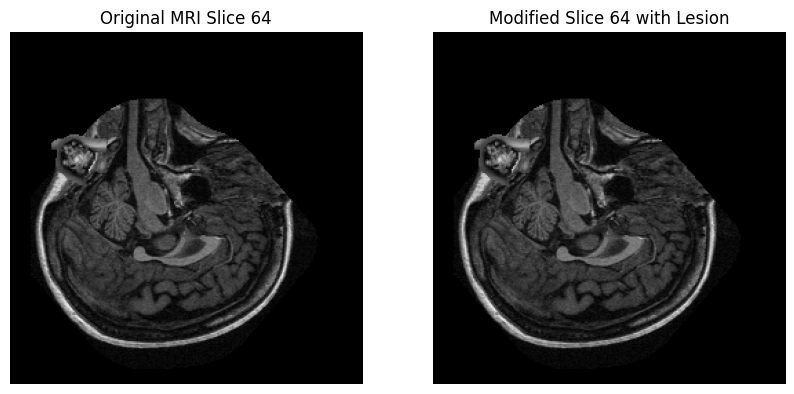

In [33]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random


def load_mri_slice(hdr_path, slice_idx):
    """
    Load an MRI volume from an HDR file and extract a specific 2D slice.
    """
    mri_obj = nib.load(hdr_path)
    mri_data = np.squeeze(mri_obj.get_fdata())  # Ensure 3D (remove extra dims)
    mri_slice = mri_data[:, :, slice_idx]
    # Normalize the slice to range 0-1
    mri_slice = (mri_slice - np.min(mri_slice)) / (np.max(mri_slice) - np.min(mri_slice))
    return mri_slice


def generate_brain_mask(mri_slice):
    """
    Generate a brain mask to define valid regions for lesion placement.
    """
    _, thresh = cv2.threshold((mri_slice * 255).astype(np.uint8), 10, 255, cv2.THRESH_BINARY)
    kernel = np.ones((5, 5), np.uint8)
    brain_mask = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    return brain_mask.astype(bool)


def extract_lesion_with_edges(lesion_image):
    """
    Extract a lesion mask by detecting edges and filling the region.
    """
    # Smooth the image
    lesion_blurred = cv2.GaussianBlur(lesion_image, (5, 5), 0)
    # Detect edges
    edges = cv2.Canny(lesion_blurred, threshold1=50, threshold2=150)
    # Dilate edges to enhance the boundary
    kernel = np.ones((5, 5), np.uint8)
    dilated_edges = cv2.dilate(edges, kernel, iterations=1)
    # Create a binary mask
    lesion_mask = np.zeros_like(lesion_image)
    lesion_mask[dilated_edges > 0] = 1
    # Fill contours to define the lesion shape
    contours, _ = cv2.findContours(lesion_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(lesion_mask, contours, -1, (1), thickness=cv2.FILLED)
    return lesion_mask


def overlay_lesion_on_slice(mri_slice, lesion_mask, lesion_image, x, y):
    """
    Overlay the lesion image onto the MRI slice with smooth blending.
    """
    h, w = lesion_mask.shape
    # Extract the region of interest (ROI)
    mri_roi = mri_slice[x:x+h, y:y+w].copy()
    # Normalize lesion and MRI intensities to 0-1
    lesion_image = lesion_image / 255.0 if lesion_image.max() > 1 else lesion_image
    mri_roi = mri_roi / 255.0 if mri_roi.max() > 1 else mri_roi
    # Blend the lesion onto the MRI slice
    blended_roi = (lesion_mask * lesion_image) + ((1 - lesion_mask) * mri_roi)
    # Place the blended ROI back into the MRI slice
    mri_slice[x:x+h, y:y+w] = blended_roi
    return mri_slice


def main():
    # Paths to MRI and lesion image
    hdr_path = '/content/OAS1_0002_MR1_mpr-2_anon.hdr'
    slice_idx = 64
    lesion_path = '/content/lesion8.png'

    # Load MRI slice
    mri_slice = load_mri_slice(hdr_path, slice_idx)

    # Generate brain mask
    brain_mask = generate_brain_mask(mri_slice)

    # Load and preprocess lesion image
    lesion_image = cv2.imread(lesion_path, cv2.IMREAD_GRAYSCALE)
    if lesion_image is None:
        raise FileNotFoundError("Lesion image not found.")
    lesion_image = cv2.resize(lesion_image, (40, 40))  # Resize lesion to smaller size
    lesion_mask = extract_lesion_with_edges(lesion_image)

    # Find valid brain coordinates
    brain_coords = np.argwhere(brain_mask)
    if len(brain_coords) == 0:
        raise ValueError("No valid brain region found in the mask.")
    # Randomly select a valid coordinate
    coord = random.choice(brain_coords)
    x, y = coord[0] - lesion_mask.shape[0] // 2, coord[1] - lesion_mask.shape[1] // 2
    x = max(0, min(x, mri_slice.shape[0] - lesion_mask.shape[0]))
    y = max(0, min(y, mri_slice.shape[1] - lesion_mask.shape[1]))

    # Overlay lesion onto MRI slice
    modified_slice = overlay_lesion_on_slice(mri_slice, lesion_mask, lesion_image, x, y)

    # Visualize results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(mri_slice.T, cmap="gray")
    plt.title(f"Original MRI Slice {slice_idx}")
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(modified_slice.T, cmap="gray")
    plt.title(f"Modified Slice {slice_idx} with Lesion")
    plt.axis("off")
    plt.show()


if __name__ == "__main__":
    main()


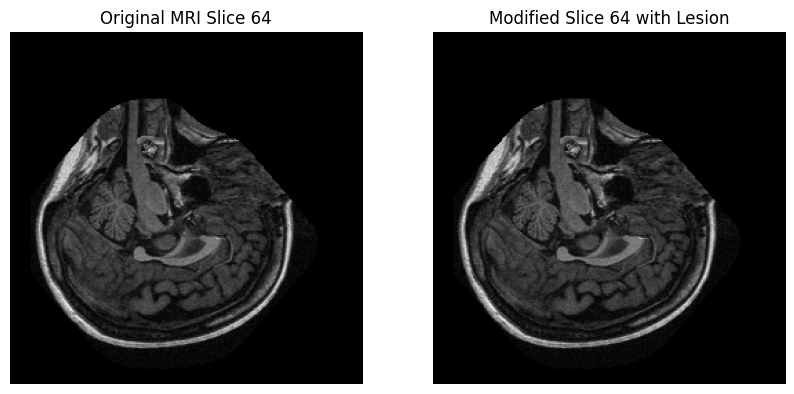

In [34]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random


def load_mri_slice(hdr_path, slice_idx):
    """
    Load an MRI volume from an HDR file and extract a specific 2D slice.
    """
    mri_obj = nib.load(hdr_path)
    mri_data = np.squeeze(mri_obj.get_fdata())  # Ensure 3D (remove extra dims)
    mri_slice = mri_data[:, :, slice_idx]
    # Normalize the slice to range 0-1
    mri_slice = (mri_slice - np.min(mri_slice)) / (np.max(mri_slice) - np.min(mri_slice))
    return mri_slice


def generate_brain_mask(mri_slice):
    """
    Generate a brain mask to define valid regions for lesion placement.
    """
    _, thresh = cv2.threshold((mri_slice * 255).astype(np.uint8), 10, 255, cv2.THRESH_BINARY)
    kernel = np.ones((5, 5), np.uint8)
    brain_mask = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    return brain_mask.astype(bool)


def extract_lesion_with_edges(lesion_image):
    """
    Extract a lesion mask by detecting edges and filling the region.
    """
    # Smooth the image
    lesion_blurred = cv2.GaussianBlur(lesion_image, (5, 5), 0)
    # Detect edges
    edges = cv2.Canny(lesion_blurred, threshold1=50, threshold2=150)
    # Dilate edges to enhance the boundary
    kernel = np.ones((5, 5), np.uint8)
    dilated_edges = cv2.dilate(edges, kernel, iterations=1)
    # Create a binary mask
    lesion_mask = np.zeros_like(lesion_image)
    lesion_mask[dilated_edges > 0] = 1
    # Fill contours to define the lesion shape
    contours, _ = cv2.findContours(lesion_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(lesion_mask, contours, -1, (1), thickness=cv2.FILLED)
    return lesion_mask


def overlay_lesion_on_slice(mri_slice, lesion_mask, lesion_image, x, y):
    """
    Overlay the lesion image onto the MRI slice with smooth blending.
    """
    h, w = lesion_mask.shape
    # Extract the region of interest (ROI)
    mri_roi = mri_slice[x:x+h, y:y+w].copy()
    # Normalize lesion and MRI intensities to 0-1
    lesion_image = lesion_image / 255.0 if lesion_image.max() > 1 else lesion_image
    mri_roi = mri_roi / 255.0 if mri_roi.max() > 1 else mri_roi
    # Blend the lesion onto the MRI slice
    blended_roi = (lesion_mask * lesion_image) + ((1 - lesion_mask) * mri_roi)
    # Place the blended ROI back into the MRI slice
    mri_slice[x:x+h, y:y+w] = blended_roi
    return mri_slice


def filter_cerebral_region(brain_mask):
    """
    Filter the brain mask to focus on the cerebral region.
    """
    h, w = brain_mask.shape
    # Consider only the central region for the cerebral area
    top = int(h * 0.25)  # Top 25% to exclude lower brainstem
    bottom = int(h * 0.75)  # Bottom 25% to exclude skull
    return brain_mask[top:bottom, :], top


def main():
    # Paths to MRI and lesion image
    hdr_path = '/content/OAS1_0002_MR1_mpr-2_anon.hdr'
    slice_idx = 64
    lesion_path = '/content/lesion8.png'

    # Load MRI slice
    mri_slice = load_mri_slice(hdr_path, slice_idx)

    # Generate brain mask
    brain_mask = generate_brain_mask(mri_slice)

    # Focus on the cerebral region
    cerebral_mask, top_offset = filter_cerebral_region(brain_mask)

    # Load and preprocess lesion image
    lesion_image = cv2.imread(lesion_path, cv2.IMREAD_GRAYSCALE)
    if lesion_image is None:
        raise FileNotFoundError("Lesion image not found.")
    lesion_image = cv2.resize(lesion_image, (20, 20))  # Reduce lesion size to 20x20 pixels
    lesion_mask = extract_lesion_with_edges(lesion_image)

    # Find valid cerebral region coordinates
    cerebral_coords = np.argwhere(cerebral_mask)
    if len(cerebral_coords) == 0:
        raise ValueError("No valid cerebral region found in the mask.")
    # Randomly select a valid coordinate
    coord = random.choice(cerebral_coords)
    x, y = coord[0] + top_offset - lesion_mask.shape[0] // 2, coord[1] - lesion_mask.shape[1] // 2
    x = max(0, min(x, mri_slice.shape[0] - lesion_mask.shape[0]))
    y = max(0, min(y, mri_slice.shape[1] - lesion_mask.shape[1]))

    # Overlay lesion onto MRI slice
    modified_slice = overlay_lesion_on_slice(mri_slice, lesion_mask, lesion_image, x, y)

    # Visualize results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(mri_slice.T, cmap="gray")
    plt.title(f"Original MRI Slice {slice_idx}")
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(modified_slice.T, cmap="gray")
    plt.title(f"Modified Slice {slice_idx} with Lesion")
    plt.axis("off")
    plt.show()


if __name__ == "__main__":
    main()


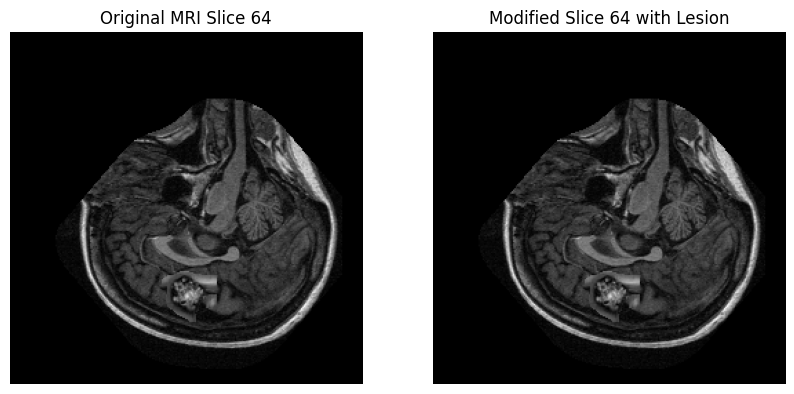

In [35]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random


def load_mri_slice(hdr_path, slice_idx):
    """
    Load an MRI volume from an HDR file and extract a specific 2D slice.
    """
    mri_obj = nib.load(hdr_path)
    mri_data = np.squeeze(mri_obj.get_fdata())  # Ensure 3D (remove extra dims)
    mri_slice = mri_data[:, :, slice_idx]
    # Normalize the slice to range 0-1
    mri_slice = (mri_slice - np.min(mri_slice)) / (np.max(mri_slice) - np.min(mri_slice))
    # Flip the slice vertically to correct orientation
    mri_slice = np.flipud(mri_slice)
    return mri_slice


def generate_brain_mask(mri_slice):
    """
    Generate a brain mask to define valid regions for lesion placement.
    """
    _, thresh = cv2.threshold((mri_slice * 255).astype(np.uint8), 10, 255, cv2.THRESH_BINARY)
    kernel = np.ones((5, 5), np.uint8)
    brain_mask = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    return brain_mask.astype(bool)


def extract_lesion_with_edges(lesion_image):
    """
    Extract a lesion mask by detecting edges and filling the region.
    """
    # Smooth the image
    lesion_blurred = cv2.GaussianBlur(lesion_image, (5, 5), 0)
    # Detect edges
    edges = cv2.Canny(lesion_blurred, threshold1=50, threshold2=150)
    # Dilate edges to enhance the boundary
    kernel = np.ones((5, 5), np.uint8)
    dilated_edges = cv2.dilate(edges, kernel, iterations=1)
    # Create a binary mask
    lesion_mask = np.zeros_like(lesion_image)
    lesion_mask[dilated_edges > 0] = 1
    # Fill contours to define the lesion shape
    contours, _ = cv2.findContours(lesion_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(lesion_mask, contours, -1, (1), thickness=cv2.FILLED)
    return lesion_mask


def overlay_lesion_on_slice(mri_slice, lesion_mask, lesion_image, x, y):
    """
    Overlay the lesion image onto the MRI slice with smooth blending.
    """
    h, w = lesion_mask.shape
    # Extract the region of interest (ROI)
    mri_roi = mri_slice[x:x+h, y:y+w].copy()
    # Normalize lesion and MRI intensities to 0-1
    lesion_image = lesion_image / 255.0 if lesion_image.max() > 1 else lesion_image
    mri_roi = mri_roi / 255.0 if mri_roi.max() > 1 else mri_roi
    # Blend the lesion onto the MRI slice
    blended_roi = (lesion_mask * lesion_image) + ((1 - lesion_mask) * mri_roi)
    # Place the blended ROI back into the MRI slice
    mri_slice[x:x+h, y:y+w] = blended_roi
    return mri_slice


def filter_cerebral_region(brain_mask):
    """
    Filter the brain mask to focus on the cerebral region.
    """
    h, w = brain_mask.shape
    # Consider only the central region for the cerebral area
    top = int(h * 0.25)  # Top 25% to exclude lower brainstem
    bottom = int(h * 0.75)  # Bottom 25% to exclude skull
    return brain_mask[top:bottom, :], top


def main():
    # Paths to MRI and lesion image
    hdr_path = '/content/OAS1_0002_MR1_mpr-2_anon.hdr'
    slice_idx = 64
    lesion_path = '/content/lesion8.png'

    # Load MRI slice
    mri_slice = load_mri_slice(hdr_path, slice_idx)

    # Generate brain mask
    brain_mask = generate_brain_mask(mri_slice)

    # Focus on the cerebral region
    cerebral_mask, top_offset = filter_cerebral_region(brain_mask)

    # Load and preprocess lesion image
    lesion_image = cv2.imread(lesion_path, cv2.IMREAD_GRAYSCALE)
    if lesion_image is None:
        raise FileNotFoundError("Lesion image not found.")
    lesion_image = cv2.resize(lesion_image, (40, 40))  # Increase lesion size to 40x40 pixels
    lesion_mask = extract_lesion_with_edges(lesion_image)

    # Find valid cerebral region coordinates
    cerebral_coords = np.argwhere(cerebral_mask)
    if len(cerebral_coords) == 0:
        raise ValueError("No valid cerebral region found in the mask.")
    # Randomly select a valid coordinate
    coord = random.choice(cerebral_coords)
    x, y = coord[0] + top_offset - lesion_mask.shape[0] // 2, coord[1] - lesion_mask.shape[1] // 2
    x = max(0, min(x, mri_slice.shape[0] - lesion_mask.shape[0]))
    y = max(0, min(y, mri_slice.shape[1] - lesion_mask.shape[1]))

    # Overlay lesion onto MRI slice
    modified_slice = overlay_lesion_on_slice(mri_slice, lesion_mask, lesion_image, x, y)

    # Visualize results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(mri_slice.T, cmap="gray")
    plt.title(f"Original MRI Slice {slice_idx}")
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(modified_slice.T, cmap="gray")
    plt.title(f"Modified Slice {slice_idx} with Lesion")
    plt.axis("off")
    plt.show()


if __name__ == "__main__":
    main()


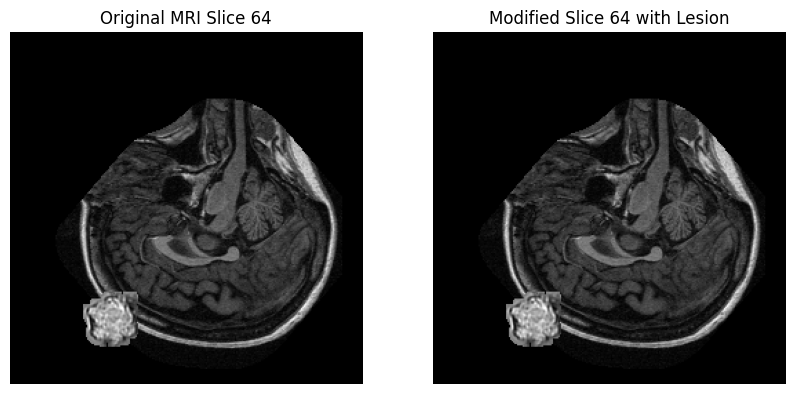

In [36]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random


def load_mri_slice(hdr_path, slice_idx):
    """
    Load an MRI volume from an HDR file and extract a specific 2D slice.
    """
    mri_obj = nib.load(hdr_path)
    mri_data = np.squeeze(mri_obj.get_fdata())  # Ensure 3D (remove extra dims)
    mri_slice = mri_data[:, :, slice_idx]
    # Normalize the slice to range 0-1
    mri_slice = (mri_slice - np.min(mri_slice)) / (np.max(mri_slice) - np.min(mri_slice))
    # Flip the slice vertically to correct orientation
    mri_slice = np.flipud(mri_slice)
    return mri_slice


def generate_brain_mask(mri_slice):
    """
    Generate a brain mask to define valid regions for lesion placement.
    """
    _, thresh = cv2.threshold((mri_slice * 255).astype(np.uint8), 10, 255, cv2.THRESH_BINARY)
    kernel = np.ones((5, 5), np.uint8)
    brain_mask = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    return brain_mask.astype(bool)


def extract_lesion_with_edges(lesion_image):
    """
    Extract a lesion mask by detecting edges and filling the region.
    """
    # Smooth the image
    lesion_blurred = cv2.GaussianBlur(lesion_image, (5, 5), 0)
    # Detect edges
    edges = cv2.Canny(lesion_blurred, threshold1=50, threshold2=150)
    # Dilate edges to enhance the boundary
    kernel = np.ones((5, 5), np.uint8)
    dilated_edges = cv2.dilate(edges, kernel, iterations=1)
    # Create a binary mask
    lesion_mask = np.zeros_like(lesion_image)
    lesion_mask[dilated_edges > 0] = 1
    # Fill contours to define the lesion shape
    contours, _ = cv2.findContours(lesion_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(lesion_mask, contours, -1, (1), thickness=cv2.FILLED)
    return lesion_mask


def overlay_lesion_on_slice(mri_slice, lesion_mask, lesion_image, x, y):
    """
    Overlay the lesion image onto the MRI slice with smooth blending.
    """
    h, w = lesion_mask.shape
    # Extract the region of interest (ROI)
    mri_roi = mri_slice[x:x+h, y:y+w].copy()
    # Normalize lesion and MRI intensities to 0-1
    lesion_image = lesion_image / 255.0 if lesion_image.max() > 1 else lesion_image
    mri_roi = mri_roi / 255.0 if mri_roi.max() > 1 else mri_roi
    # Blend the lesion onto the MRI slice
    blended_roi = (lesion_mask * lesion_image) + ((1 - lesion_mask) * mri_roi)
    # Place the blended ROI back into the MRI slice
    mri_slice[x:x+h, y:y+w] = blended_roi
    return mri_slice


def filter_cerebral_region(brain_mask):
    """
    Filter the brain mask to focus on the cerebral region.
    """
    h, w = brain_mask.shape
    # Consider only the central region for the cerebral area
    top = int(h * 0.25)  # Top 25% to exclude lower brainstem
    bottom = int(h * 0.75)  # Bottom 25% to exclude skull
    return brain_mask[top:bottom, :], top


def main():
    # Paths to MRI and lesion image
    hdr_path = '/content/OAS1_0002_MR1_mpr-2_anon.hdr'
    slice_idx = 64
    lesion_path = '/content/lesion2.png'

    # Load MRI slice
    mri_slice = load_mri_slice(hdr_path, slice_idx)

    # Generate brain mask
    brain_mask = generate_brain_mask(mri_slice)

    # Focus on the cerebral region
    cerebral_mask, top_offset = filter_cerebral_region(brain_mask)

    # Load and preprocess lesion image
    lesion_image = cv2.imread(lesion_path, cv2.IMREAD_GRAYSCALE)
    if lesion_image is None:
        raise FileNotFoundError("Lesion image not found.")
    lesion_image = cv2.resize(lesion_image, (40, 40))  # Increase lesion size to 40x40 pixels
    lesion_mask = extract_lesion_with_edges(lesion_image)

    # Find valid cerebral region coordinates
    cerebral_coords = np.argwhere(cerebral_mask)
    if len(cerebral_coords) == 0:
        raise ValueError("No valid cerebral region found in the mask.")
    # Randomly select a valid coordinate
    coord = random.choice(cerebral_coords)
    x, y = coord[0] + top_offset - lesion_mask.shape[0] // 2, coord[1] - lesion_mask.shape[1] // 2
    x = max(0, min(x, mri_slice.shape[0] - lesion_mask.shape[0]))
    y = max(0, min(y, mri_slice.shape[1] - lesion_mask.shape[1]))

    # Overlay lesion onto MRI slice
    modified_slice = overlay_lesion_on_slice(mri_slice, lesion_mask, lesion_image, x, y)

    # Visualize results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(mri_slice.T, cmap="gray")
    plt.title(f"Original MRI Slice {slice_idx}")
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(modified_slice.T, cmap="gray")
    plt.title(f"Modified Slice {slice_idx} with Lesion")
    plt.axis("off")
    plt.show()


if __name__ == "__main__":
    main()


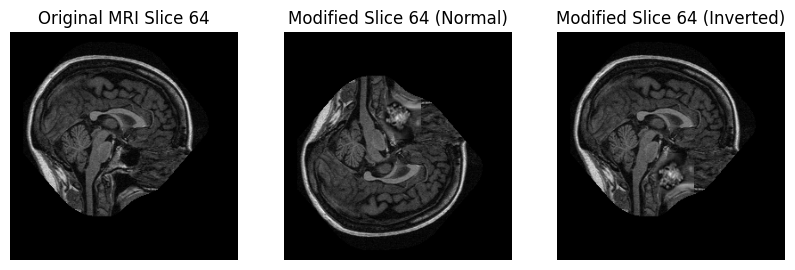

In [37]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random


def load_mri_slice(hdr_path, slice_idx):
    """
    Load an MRI volume from an HDR file and extract a specific 2D slice.
    """
    mri_obj = nib.load(hdr_path)
    mri_data = np.squeeze(mri_obj.get_fdata())  # Ensure 3D (remove extra dims)
    mri_slice = mri_data[:, :, slice_idx]
    # Normalize the slice to range 0-1
    mri_slice = (mri_slice - np.min(mri_slice)) / (np.max(mri_slice) - np.min(mri_slice))
    return mri_slice


def generate_brain_mask(mri_slice):
    """
    Generate a brain mask to define valid regions for lesion placement.
    """
    _, thresh = cv2.threshold((mri_slice * 255).astype(np.uint8), 10, 255, cv2.THRESH_BINARY)
    kernel = np.ones((5, 5), np.uint8)
    brain_mask = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    return brain_mask.astype(bool)


def extract_lesion_with_edges(lesion_image):
    """
    Extract a lesion mask by detecting edges and filling the region.
    """
    # Smooth the image
    lesion_blurred = cv2.GaussianBlur(lesion_image, (5, 5), 0)
    # Detect edges
    edges = cv2.Canny(lesion_blurred, threshold1=50, threshold2=150)
    # Dilate edges to enhance the boundary
    kernel = np.ones((5, 5), np.uint8)
    dilated_edges = cv2.dilate(edges, kernel, iterations=1)
    # Create a binary mask
    lesion_mask = np.zeros_like(lesion_image)
    lesion_mask[dilated_edges > 0] = 1
    # Fill contours to define the lesion shape
    contours, _ = cv2.findContours(lesion_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(lesion_mask, contours, -1, (1), thickness=cv2.FILLED)
    return lesion_mask


def overlay_lesion_on_slice(mri_slice, lesion_mask, lesion_image, x, y):
    """
    Overlay the lesion image onto the MRI slice with smooth blending.
    """
    h, w = lesion_mask.shape
    # Extract the region of interest (ROI)
    mri_roi = mri_slice[x:x+h, y:y+w].copy()
    # Normalize lesion and MRI intensities to 0-1
    lesion_image = lesion_image / 255.0 if lesion_image.max() > 1 else lesion_image
    mri_roi = mri_roi / 255.0 if mri_roi.max() > 1 else mri_roi
    # Blend the lesion onto the MRI slice
    alpha = cv2.GaussianBlur(lesion_mask.astype(float), (15, 15), 5)  # Smooth alpha mask
    blended_roi = (alpha * lesion_image) + ((1 - alpha) * mri_roi)
    # Place the blended ROI back into the MRI slice
    mri_slice[x:x+h, y:y+w] = blended_roi
    return mri_slice


def filter_cerebral_region(brain_mask):
    """
    Filter the brain mask to focus on the cerebral region.
    """
    h, w = brain_mask.shape
    # Consider only the central region for the cerebral area
    top = int(h * 0.25)  # Top 25% to exclude lower brainstem
    bottom = int(h * 0.75)  # Bottom 25% to exclude skull
    return brain_mask[top:bottom, :], top


def main():
    # Paths to MRI and lesion image
    hdr_path = '/content/OAS1_0002_MR1_mpr-2_anon.hdr'
    slice_idx = 64
    lesion_path = '/content/lesion8.png'

    # Load MRI slice
    mri_slice = load_mri_slice(hdr_path, slice_idx)

    # Generate brain mask
    brain_mask = generate_brain_mask(mri_slice)

    # Focus on the cerebral region
    cerebral_mask, top_offset = filter_cerebral_region(brain_mask)

    # Load and preprocess lesion image
    lesion_image = cv2.imread(lesion_path, cv2.IMREAD_GRAYSCALE)
    if lesion_image is None:
        raise FileNotFoundError("Lesion image not found.")
    lesion_image = cv2.resize(lesion_image, (50, 50))  # Slightly larger lesion size
    lesion_mask = extract_lesion_with_edges(lesion_image)

    # Find valid cerebral region coordinates
    cerebral_coords = np.argwhere(cerebral_mask)
    if len(cerebral_coords) == 0:
        raise ValueError("No valid cerebral region found in the mask.")
    # Randomly select a valid coordinate
    coord = random.choice(cerebral_coords)
    x = coord[0] + top_offset - lesion_mask.shape[0] // 2 + random.randint(-10, 10)  # Add random offset
    y = coord[1] - lesion_mask.shape[1] // 2 + random.randint(-10, 10)  # Add random offset
    x = max(0, min(x, mri_slice.shape[0] - lesion_mask.shape[0]))
    y = max(0, min(y, mri_slice.shape[1] - lesion_mask.shape[1]))

    # Overlay lesion onto MRI slice
    modified_slice = overlay_lesion_on_slice(mri_slice.copy(), lesion_mask, lesion_image, x, y)

    # Visualize results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(np.flipud(mri_slice.T), cmap="gray")  # Original inverted slice
    plt.title(f"Original MRI Slice {slice_idx}")
    plt.axis("off")
    plt.subplot(1, 3, 2)
    plt.imshow(modified_slice.T, cmap="gray")
    plt.title(f"Modified Slice {slice_idx} (Normal)")
    plt.axis("off")
    plt.subplot(1, 3, 3)
    plt.imshow(np.flipud(modified_slice.T), cmap="gray")  # Inverted display
    plt.title(f"Modified Slice {slice_idx} (Inverted)")
    plt.axis("off")
    plt.show()


if __name__ == "__main__":
    main()


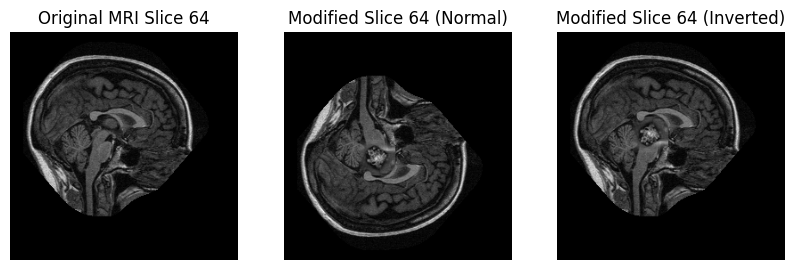

In [38]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random


def load_mri_slice(hdr_path, slice_idx):
    """
    Load an MRI volume from an HDR file and extract a specific 2D slice.
    """
    mri_obj = nib.load(hdr_path)
    mri_data = np.squeeze(mri_obj.get_fdata())  # Ensure 3D (remove extra dims)
    mri_slice = mri_data[:, :, slice_idx]
    # Normalize the slice to range 0-1
    mri_slice = (mri_slice - np.min(mri_slice)) / (np.max(mri_slice) - np.min(mri_slice))
    return mri_slice


def generate_brain_mask(mri_slice):
    """
    Generate a brain mask to define valid regions for lesion placement.
    """
    _, thresh = cv2.threshold((mri_slice * 255).astype(np.uint8), 10, 255, cv2.THRESH_BINARY)
    kernel = np.ones((5, 5), np.uint8)
    brain_mask = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    return brain_mask.astype(bool)


def extract_lesion_with_edges(lesion_image):
    """
    Extract a lesion mask by detecting edges and filling the region.
    """
    # Smooth the image
    lesion_blurred = cv2.GaussianBlur(lesion_image, (5, 5), 0)
    # Detect edges
    edges = cv2.Canny(lesion_blurred, threshold1=50, threshold2=150)
    # Dilate edges to enhance the boundary
    kernel = np.ones((5, 5), np.uint8)
    dilated_edges = cv2.dilate(edges, kernel, iterations=1)
    # Create a binary mask
    lesion_mask = np.zeros_like(lesion_image)
    lesion_mask[dilated_edges > 0] = 1
    # Fill contours to define the lesion shape
    contours, _ = cv2.findContours(lesion_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(lesion_mask, contours, -1, (1), thickness=cv2.FILLED)
    return lesion_mask


def overlay_lesion_on_slice(mri_slice, lesion_mask, lesion_image, x, y):
    """
    Overlay the lesion image onto the MRI slice with smooth blending.
    """
    h, w = lesion_mask.shape
    # Extract the region of interest (ROI)
    mri_roi = mri_slice[x:x+h, y:y+w].copy()
    # Normalize lesion and MRI intensities to 0-1
    lesion_image = lesion_image / 255.0 if lesion_image.max() > 1 else lesion_image
    mri_roi = mri_roi / 255.0 if mri_roi.max() > 1 else mri_roi
    # Blend the lesion onto the MRI slice
    alpha = cv2.GaussianBlur(lesion_mask.astype(float), (15, 15), 5)  # Smooth alpha mask
    blended_roi = (alpha * lesion_image) + ((1 - alpha) * mri_roi)
    # Place the blended ROI back into the MRI slice
    mri_slice[x:x+h, y:y+w] = blended_roi
    return mri_slice


def filter_cerebral_region(brain_mask):
    """
    Filter the brain mask to focus on the cerebral region.
    """
    h, w = brain_mask.shape
    # Consider only the central region for the cerebral area
    top = int(h * 0.2)  # Top 20% to exclude lower regions (spinal/cerebellum)
    bottom = int(h * 0.6)  # Bottom 60% to exclude lower parts
    cerebral_mask = brain_mask[top:bottom, :]
    return cerebral_mask, top


def main():
    # Paths to MRI and lesion image
    hdr_path = '/content/OAS1_0002_MR1_mpr-2_anon.hdr'
    slice_idx = 64
    lesion_path = '/content/lesion8.png'

    # Load MRI slice
    mri_slice = load_mri_slice(hdr_path, slice_idx)

    # Generate brain mask
    brain_mask = generate_brain_mask(mri_slice)

    # Focus on the cerebral region
    cerebral_mask, top_offset = filter_cerebral_region(brain_mask)

    # Load and preprocess lesion image
    lesion_image = cv2.imread(lesion_path, cv2.IMREAD_GRAYSCALE)
    if lesion_image is None:
        raise FileNotFoundError("Lesion image not found.")
    lesion_image = cv2.resize(lesion_image, (40, 40))  # Slightly larger lesion size
    lesion_mask = extract_lesion_with_edges(lesion_image)

    # Find valid cerebral region coordinates
    cerebral_coords = np.argwhere(cerebral_mask)
    if len(cerebral_coords) == 0:
        raise ValueError("No valid cerebral region found in the mask.")
    # Randomly select a valid coordinate
    coord = random.choice(cerebral_coords)
    x = coord[0] + top_offset - lesion_mask.shape[0] // 2 + random.randint(-10, 10)  # Add random offset
    y = coord[1] - lesion_mask.shape[1] // 2 + random.randint(-10, 10)  # Add random offset
    x = max(0, min(x, mri_slice.shape[0] - lesion_mask.shape[0]))
    y = max(0, min(y, mri_slice.shape[1] - lesion_mask.shape[1]))

    # Overlay lesion onto MRI slice
    modified_slice = overlay_lesion_on_slice(mri_slice.copy(), lesion_mask, lesion_image, x, y)

    # Visualize results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(np.flipud(mri_slice.T), cmap="gray")  # Original inverted slice
    plt.title(f"Original MRI Slice {slice_idx}")
    plt.axis("off")
    plt.subplot(1, 3, 2)
    plt.imshow(modified_slice.T, cmap="gray")
    plt.title(f"Modified Slice {slice_idx} (Normal)")
    plt.axis("off")
    plt.subplot(1, 3, 3)
    plt.imshow(np.flipud(modified_slice.T), cmap="gray")  # Inverted display
    plt.title(f"Modified Slice {slice_idx} (Inverted)")
    plt.axis("off")
    plt.show()


if __name__ == "__main__":
    main()
